### Exemplo Real: Carteira de Ativos

- Temos a carteira no arquivo "Carteira.xlsx" e queremos comparar essa carteira com o índice IBOV para saber se ela ganhou do índice

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

In [3]:
df_carteira = pd.read_excel("Carteira.xlsx")
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [4]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA")

df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"]
display(df_cotacoes)

[*********************100%%**********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-01-31,13.251731,87.851059,109.839996,21.188190,12.00,24.190475,129.100662,4.43,7.445785,14.550000,99.440002,86.287216,84.049110
2023-02-01,12.996527,86.965843,108.400002,20.934088,12.24,23.872856,126.590027,4.29,7.159788,14.000000,99.650002,86.686707,84.728111
2023-02-02,13.194322,85.445778,106.300003,20.122917,12.05,24.092661,127.259521,4.34,7.130202,14.160000,98.370003,87.429901,84.904854
2023-02-03,12.900907,85.481537,104.870003,19.614712,11.77,24.006651,127.398987,4.27,6.992135,14.000000,95.599998,87.913002,84.997864
2023-02-06,12.853580,84.408562,105.250000,19.644033,11.75,24.016209,126.924759,4.13,6.824481,14.200000,95.000000,85.748383,84.132805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,15.640000,75.010002,123.839996,36.820000,12.69,32.939999,165.149994,2.03,10.000000,17.240000,107.139999,94.500000,110.000000
2024-01-22,15.460000,75.500000,122.699997,36.860001,12.72,32.400002,164.490005,1.95,9.500000,16.980000,105.879997,94.000000,110.000000
2024-01-23,15.380000,75.510002,124.550003,37.250000,12.95,32.549999,163.669998,1.94,9.580000,17.280001,106.830002,92.730003,110.139999


#### Ajustando os dados

In [5]:
df_cotacoes = df_cotacoes.ffill()
print(df_cotacoes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-01-31 to 2024-01-25
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   245 non-null    float64
 1   BCRI11.SA  245 non-null    float64
 2   BOVA11.SA  245 non-null    float64
 3   BPAC11.SA  245 non-null    float64
 4   ENEV3.SA   245 non-null    float64
 5   ITUB4.SA   245 non-null    float64
 6   KNRI11.SA  245 non-null    float64
 7   MGLU3.SA   245 non-null    float64
 8   MOVI3.SA   245 non-null    float64
 9   NTCO3.SA   245 non-null    float64
 10  SMAL11.SA  245 non-null    float64
 11  VILG11.SA  245 non-null    float64
 12  XPLG11.SA  245 non-null    float64
dtypes: float64(13)
memory usage: 26.8 KB
None


#### Para compararmos oscilações, precisamos normalizar

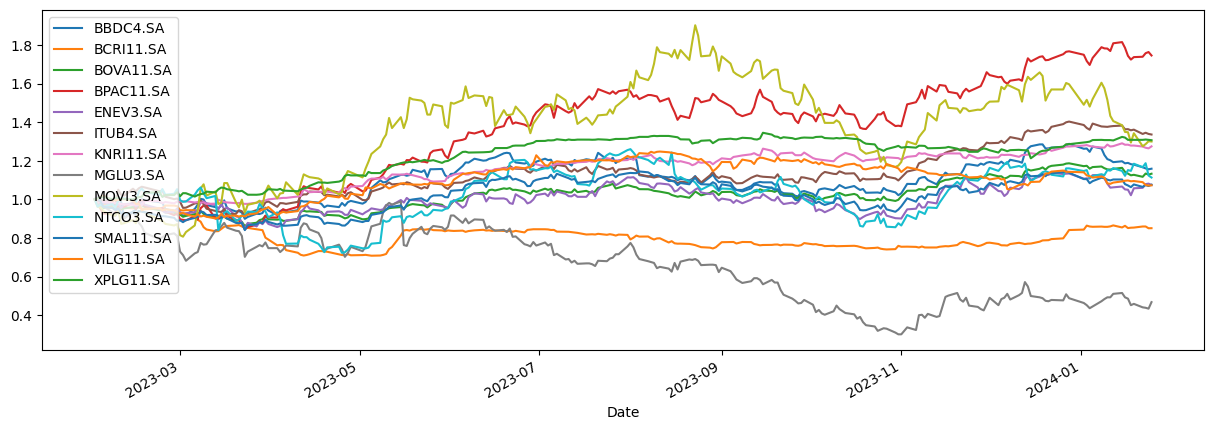

In [6]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15, 5))
plt.legend(loc="upper left")
plt.show()

#### Puxando o IBOV para comparar

In [7]:
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)["Adj Close"]
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2023-01-31    113532.0
2023-02-01    112303.0
2023-02-02    109935.0
2023-02-03    108490.0
2023-02-06    108456.0
                ...   
2024-01-19    127636.0
2024-01-22    126602.0
2024-01-23    128263.0
2024-01-24    127816.0
2024-01-25    128169.0
Name: Adj Close, Length: 245, dtype: float64

#### Vendo valores investidos

In [8]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]

df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-01-31,10983.999634,9944.000244,442.999983,1325.173092,7257.142639,1200.000000,744.578505,2118.819046,1455.000019,8785.105896,8628.721619,12910.066223,8404.911041,74200.517941
2023-02-01,10840.000153,9965.000153,428.999996,1299.652672,7161.856842,1223.999977,715.978813,2093.408775,1400.000000,8696.584320,8668.670654,12659.002686,8472.811127,73625.966167
2023-02-02,10630.000305,9837.000275,434.000015,1319.432163,7227.798271,1205.000019,713.020229,2012.291718,1415.999985,8544.577789,8742.990112,12725.952148,8490.485382,73298.548412
2023-02-03,10487.000275,9559.999847,426.999998,1290.090656,7201.995277,1177.000046,699.213457,1961.471176,1400.000000,8548.153687,8791.300201,12739.898682,8499.786377,72782.909679
2023-02-06,10525.000000,9500.000000,413.000011,1285.358047,7204.862595,1175.000000,682.448101,1964.403343,1419.999981,8440.856171,8574.838257,12692.475891,8413.280487,72291.522884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-19,12383.999634,10713.999939,202.999997,1564.000034,9881.999588,1268.999958,1000.000000,3681.999969,1723.999977,7501.000214,9450.000000,16514.999390,11000.000000,86887.998700
2024-01-22,12269.999695,10587.999725,195.000005,1546.000004,9720.000458,1272.000027,950.000000,3686.000061,1697.999954,7550.000000,9400.000000,16449.000549,11000.000000,86324.000478
2024-01-23,12455.000305,10683.000183,194.000006,1538.000011,9764.999771,1294.999981,957.999992,3725.000000,1728.000069,7551.000214,9273.000336,16366.999817,11013.999939,86546.000624


#### Comparando carteira com o Índice

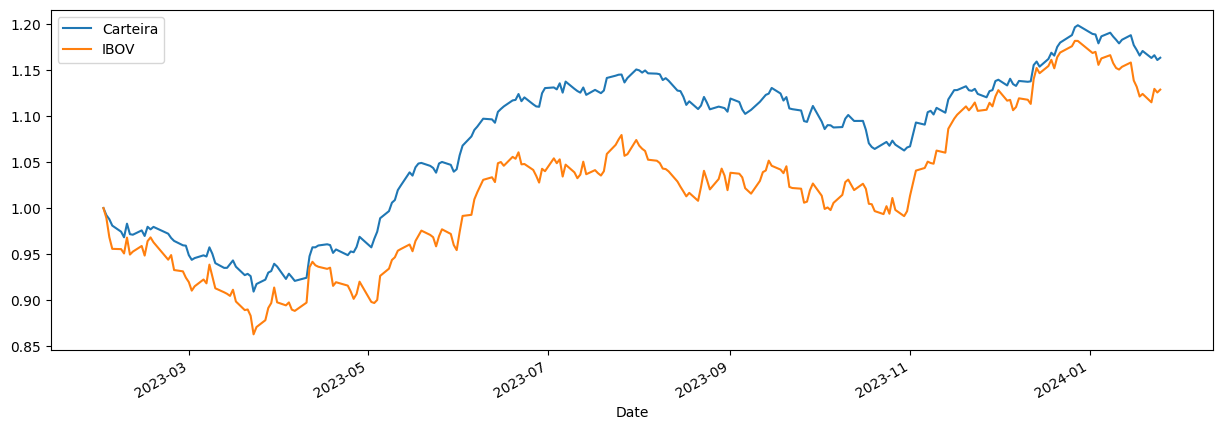

In [9]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15, 5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
plt.show()

#### Calculando retorno e correlação

In [10]:
# Retorno
retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1

print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")

Retorno IBOV: 12.9%
Retorno Carteira: 16.4%


C:\Users\fabri\AppData\Local\Temp\ipykernel_13804\3512280184.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = df_ibov_norm[-1] - 1
C:\Users\fabri\AppData\Local\Temp\ipykernel_13804\3512280184.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_carteira = df_valor_investido_norm["Total"][-1] - 1


In [11]:
# Correlação
print(df_valor_investido["Total"].corr(df_ibov))

0.9367303373842432
